In [44]:
import pandas as pd

file = 'data/metacritic_games.csv'
data = pd.read_csv(file)
data.head()

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,Portal 2,PC,Valve Software,Action,NaN,E10+,"Apr 18, 2011",51,1,0,1700,107,19,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,"Nov 10, 2011",32,0,0,1616,322,451,94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,No Online Multiplayer,E10+,"Jun 19, 2011",84,1,0,283,20,5,94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,NaN,T,"Nov 21, 2011",27,0,0,240,34,27,91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,No Online Multiplayer,E,"Nov 13, 2011",81,1,0,251,39,11,90,84


# Data exploration

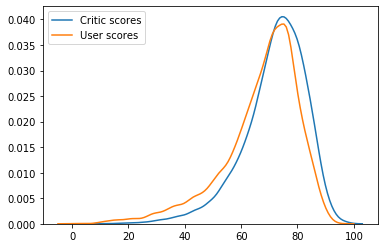

In [17]:
import seaborn as sns

mscores = data['metascore']
uscores = data['user_score']

sns.kdeplot(mscores, bw = 2, label = "Critic scores")
sns.kdeplot(uscores, bw = 2, label = "User scores")

In [54]:
data_critics = data.drop(columns = ['user_score'])
data_critics['fromCritic'] = 1
data_critics = data_critics.rename(columns = {"metascore": "score"})

data_user = data.drop(columns = ['metascore'])
data_user['fromCritic'] = 0
data_user = data_user.rename(columns = {"user_score": "score"})

data_critics_user = pd.concat([data_critics, data_user],ignore_index = True)

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,score,fromCritic
0,Portal 2,PC,Valve Software,Action,NaN,E10+,"Apr 18, 2011",51,1,0,1700,107,19,95,1
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,"Nov 10, 2011",32,0,0,1616,322,451,94,1
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,No Online Multiplayer,E10+,"Jun 19, 2011",84,1,0,283,20,5,94,1
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,NaN,T,"Nov 21, 2011",27,0,0,240,34,27,91,1
4,Super Mario 3D Land,3DS,Nintendo,Action,No Online Multiplayer,E,"Nov 13, 2011",81,1,0,251,39,11,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,Modern Combat: Blackout,Switch,Gameloft,Action,No Online Multiplayer,NaN,"Feb 14, 2019",0,5,2,1,0,1,57,0
11394,Fimbul,PS4,Zaxis,Action Adventure,No Online Multiplayer,NaN,"Feb 28, 2019",0,7,2,1,0,0,18,0
11395,Generation Zero,PC,Avalanche Studios,Action Adventure,Online Multiplayer,T,"Mar 26, 2019",1,11,6,5,2,6,57,0
11396,Vane,PS4,Friend & Foe,Adventure,No Online Multiplayer,E10+,"Jan 15, 2019",3,26,22,2,2,2,55,0


In [59]:
common_genres = list(data['genre'].value_counts()[:8].index)
common_genres_data = data_critics_user.loc[data_critics_user['genre'].isin(common_genres)]

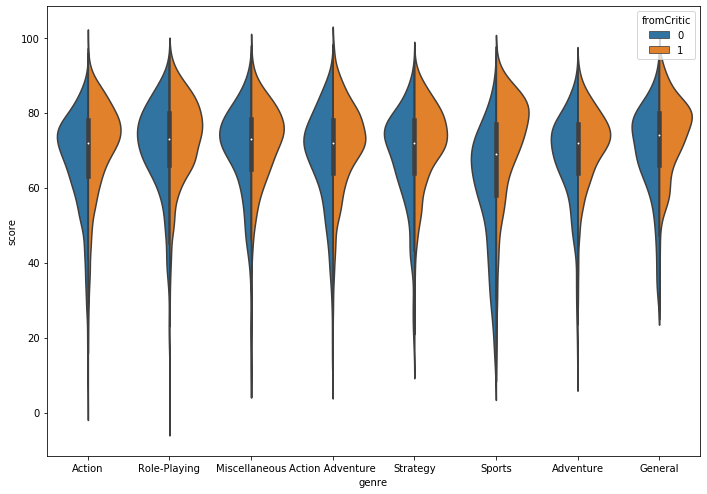

In [60]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize = (11.7, 8.27))
sns.violinplot(ax = ax, x = "genre", y = "score", hue = "fromCritic", data = common_genres_data, split = True)